In [1]:
import ee, datetime    # Google Earth Engine
import pandas as pd
import numpy as np
import folium
import geehydro
from datetime import datetime as dt
from IPython.display import Image
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ee.Initialize()

Importing plotly failed. Interactive plots will not work.


In [2]:
import ee
import geemap
from pandas import Series

In [11]:
# Up-sampple the date column
monsoon=pd.read_csv(r"C:/Users/RITIKA/Desktop/Monsoon.csv")
Post_monsoon=pd.read_csv(r"C:/Users/RITIKA/Desktop/Post monsoon.csv")
Pre_monsoon=pd.read_csv(r"C:/Users/RITIKA/Desktop/Pre monsoon NDVI data.csv")

Winter_NDVI = pd.read_csv(r"C:/Users/RITIKA/Desktop/Winter NDVI data.csv")

monsoon['Year']=pd.to_datetime(monsoon['Year'])
monsoon.set_index('Year', inplace=True)
Post_monsoon['Year']=pd.to_datetime(Post_monsoon['Year'])
Post_monsoon.set_index('Year', inplace=True)
Pre_monsoon['Year']=pd.to_datetime(Pre_monsoon['Year'])
Pre_monsoon.set_index('Year', inplace=True)
Winter_NDVI['Year']=pd.to_datetime(Winter_NDVI['Year'])
Winter_NDVI.set_index('Year', inplace=True)







In [14]:
monsoon.tail(10)

,Trend
Year,
2019-09-21,0.605216
2019-09-22,0.605219
2019-09-23,0.605273
2019-09-24,0.605378
2019-09-25,0.605536
2019-09-26,0.605712
2019-09-27,0.605906
2019-09-28,0.606120
2019-09-29,0.606352


In [5]:
# Linear interpolate NDVI data

monsoon.interpolate(method='polynomial', order = 1, inplace = True)
Post_monsoon.interpolate(method='polynomial', order = 1, inplace = True)
Pre_monsoon.interpolate(method='polynomial', order = 1, inplace = True)
Winter_NDVI.interpolate(method='polynomial', order = 1, inplace = True)


monsoon.head(100)
Post_monsoon.head()
Pre_monsoon.head()
Winter_NDVI.head()


,trebd
Year,
1988-12-01,0.241095
1988-12-02,0.241128
1988-12-03,0.241154
1988-12-04,0.241172
1988-12-05,0.241182


In [6]:
from statsmodels.tsa.stattools import adfuller

X = monsoon['Trend'].dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.008221
p-value: 0.957847
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [7]:
y=Post_monsoon['trend'].dropna()
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.388921
p-value: 0.911932
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [8]:
z=Pre_monsoon['NDVI'].dropna()
result = adfuller(z)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.055747
p-value: 0.962907
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [9]:
a=Winter_NDVI['trebd'].dropna()
result = adfuller(a)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.642302
p-value: 0.861134
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


<AxesSubplot:ylabel='Density'>

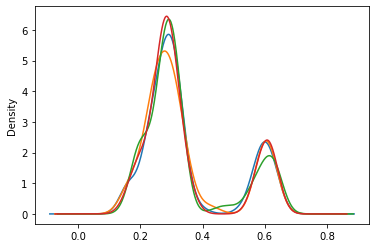

In [10]:
monsoon['Trend'].dropna().plot(kind='kde', Label='monsoon')
Post_monsoon['trend'].dropna().plot(kind='kde')
Pre_monsoon['NDVI'].dropna().plot(kind='kde')
Winter_NDVI['trebd'].dropna().plot(kind='kde')


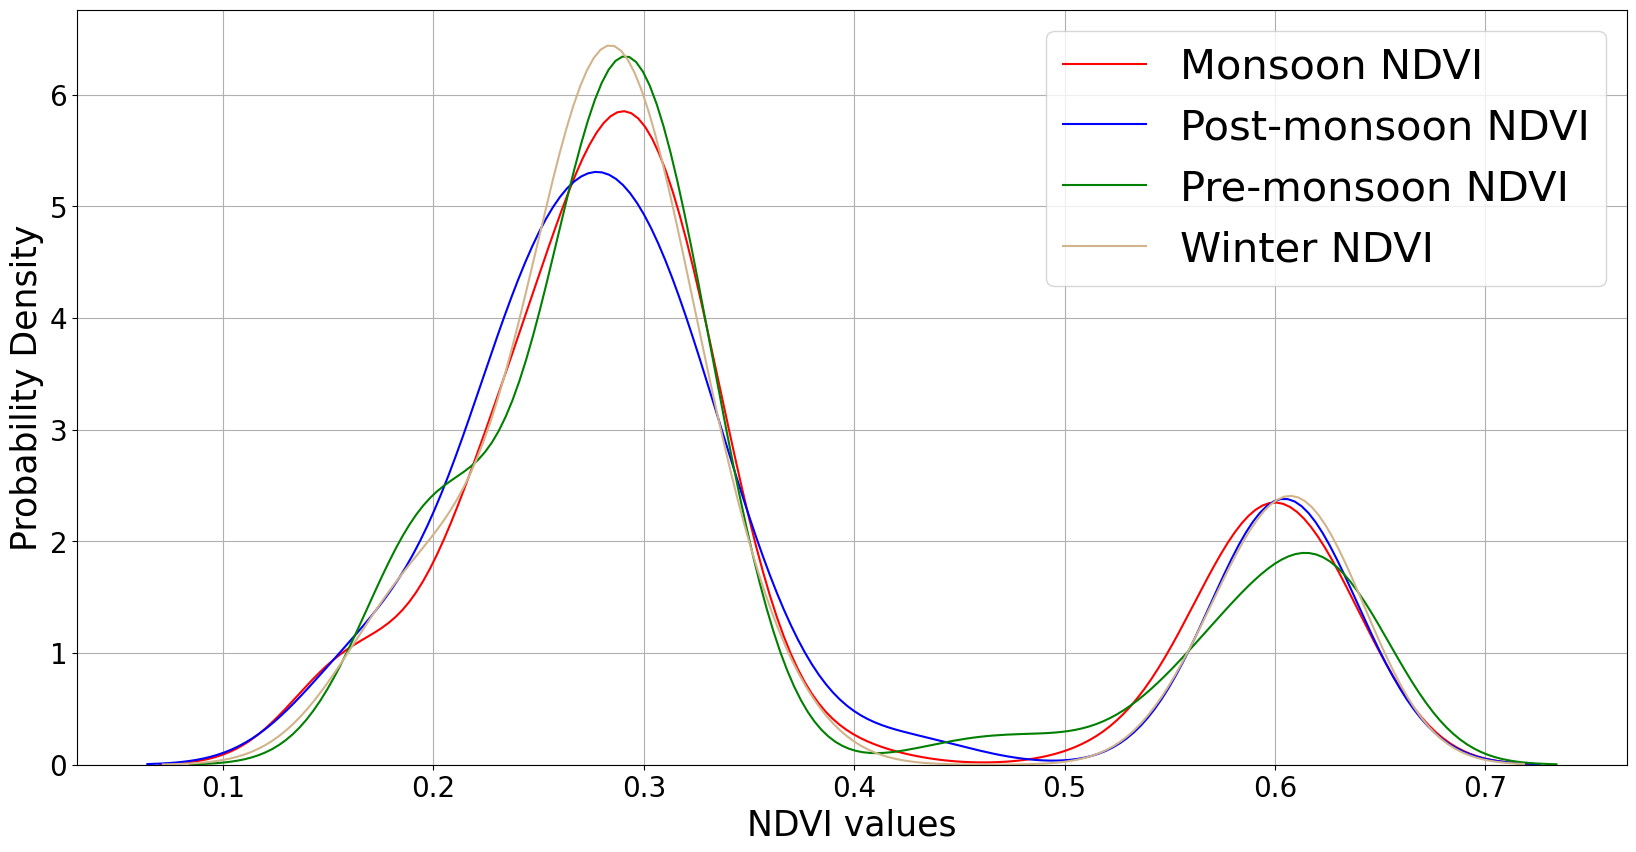

In [69]:
# Plotting the KDE Plot 

plt.figure(figsize=(20,10), dpi=100)
plt.rcParams['font.size'] = '20'
plt.grid(True)
sns.kdeplot(monsoon['Trend'],color='red', Label='Monsoon NDVI') 
sns.kdeplot(Post_monsoon['trend'],color='blue', Label='Post-monsoon NDVI') 
sns.kdeplot(Pre_monsoon['NDVI'],color='green', Label='Pre-monsoon NDVI') 
sns.kdeplot(Winter_NDVI['trebd'],color='tan', Label='Winter NDVI') 

plt.legend(fontsize='30')
                             

plt.xlabel('NDVI values',fontsize='25') 
plt.ylabel('Probability Density',fontsize='25') 
plt.savefig("D:/EVI papers/plots for 1988-2020/probability distribution2.jpg")



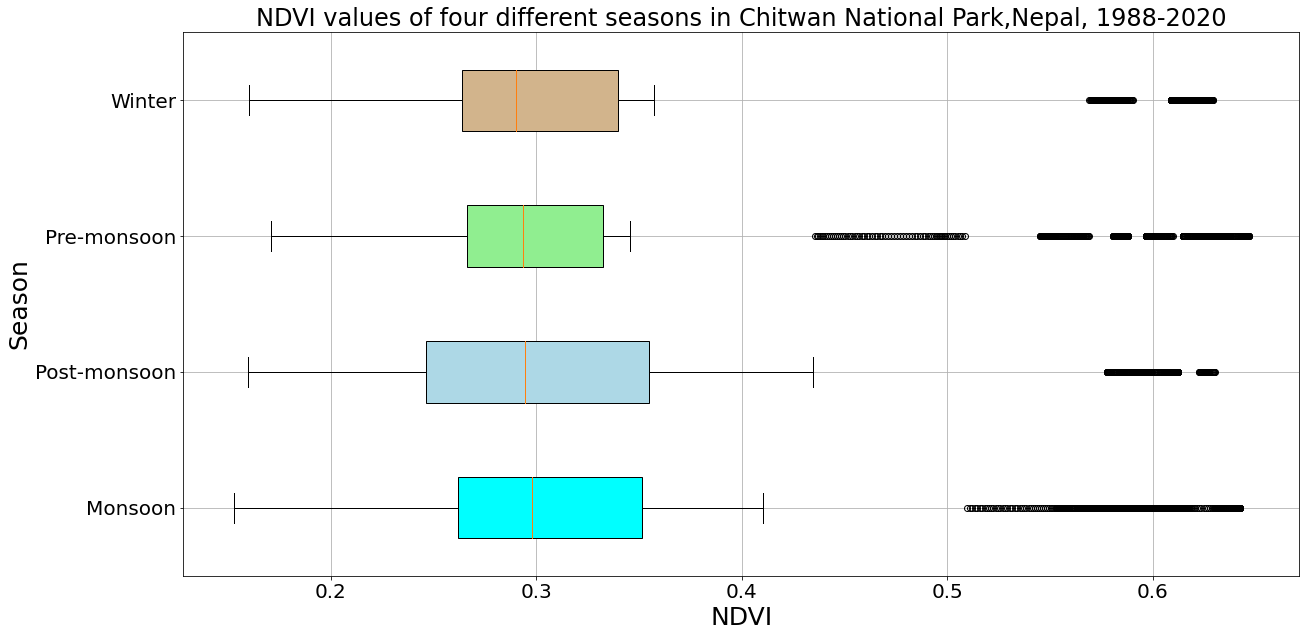

In [75]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '20'
box_plot_data=[monsoon['Trend'].dropna(),Post_monsoon['trend'].dropna(),Pre_monsoon['NDVI'].dropna(),Winter_NDVI['trebd'].dropna()]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Monsoon','Post-monsoon','Pre-monsoon','Winter'])
plt.grid(True)
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('NDVI', fontsize='25')
plt.ylabel('Season', fontsize='25')
plt.title('NDVI values of four different seasons in Chitwan National Park,Nepal, 1988-2020')
plt.savefig("D:/EVI papers/plots for 1988-2020/boxplotsseasons.jpg")
plt.show()

In [27]:
monsoon['Trend'].dropna().mean()

0.3474405504433155

In [10]:
monsoon['Trend'].dropna().std()

0.1438178954379584

In [29]:
Post_monsoon['trend'].dropna().mean()

0.34172040876460863

In [11]:
Post_monsoon['trend'].dropna().std()

0.1429618594392481

In [23]:
Pre_monsoon['NDVI'].dropna().mean()

0.3438288664583333

In [12]:
Pre_monsoon['NDVI'].dropna().std()

0.1413572837906378

In [24]:
Winter_NDVI['trebd'].dropna().mean()

0.3427181118143713

In [13]:
Winter_NDVI['trebd'].dropna().std()

0.14208109910531388

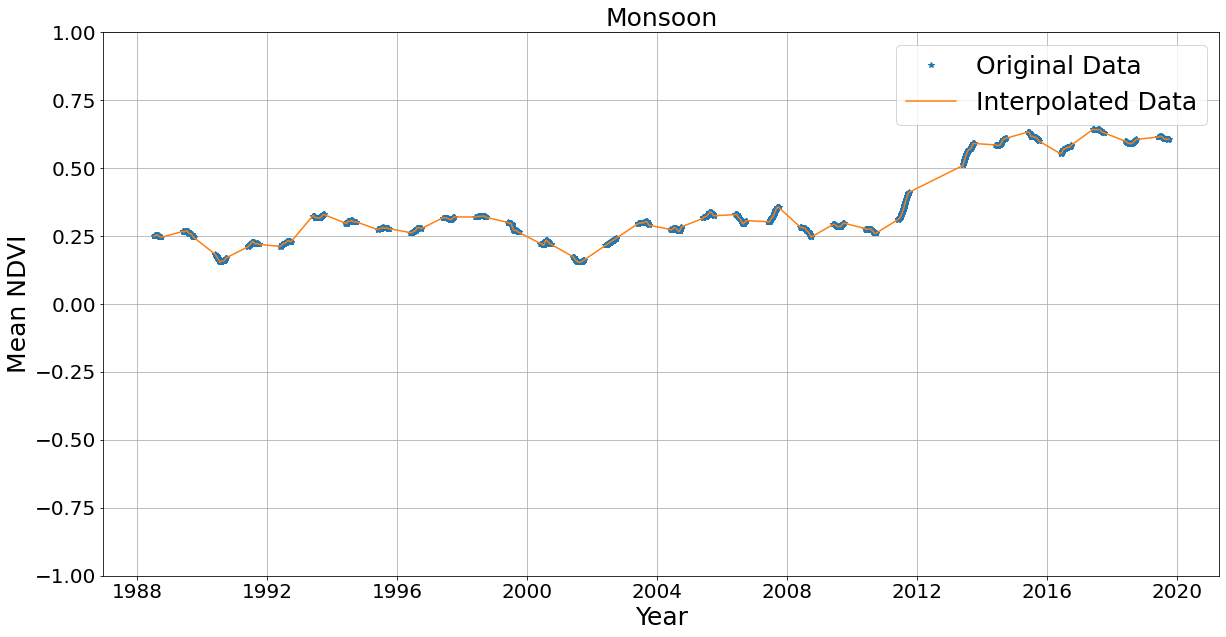

In [79]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(monsoon['Trend'].dropna(), '*')
plt.plot(monsoon['Trend'].dropna())
plt.plot()

plt.xlabel('Year', fontsize=25)
plt.ylabel('Mean NDVI', fontsize=25)
plt.legend(['Original Data', 'Interpolated Data'],fontsize=25)
plt.title("Monsoon", fontsize=25)
plt.ylim([-1, 1])
plt.savefig("D:/EVI papers/plots for 1988-2020/meanndvifrom1988-2020ofmonsoon29october2.jpg")
plt.show()

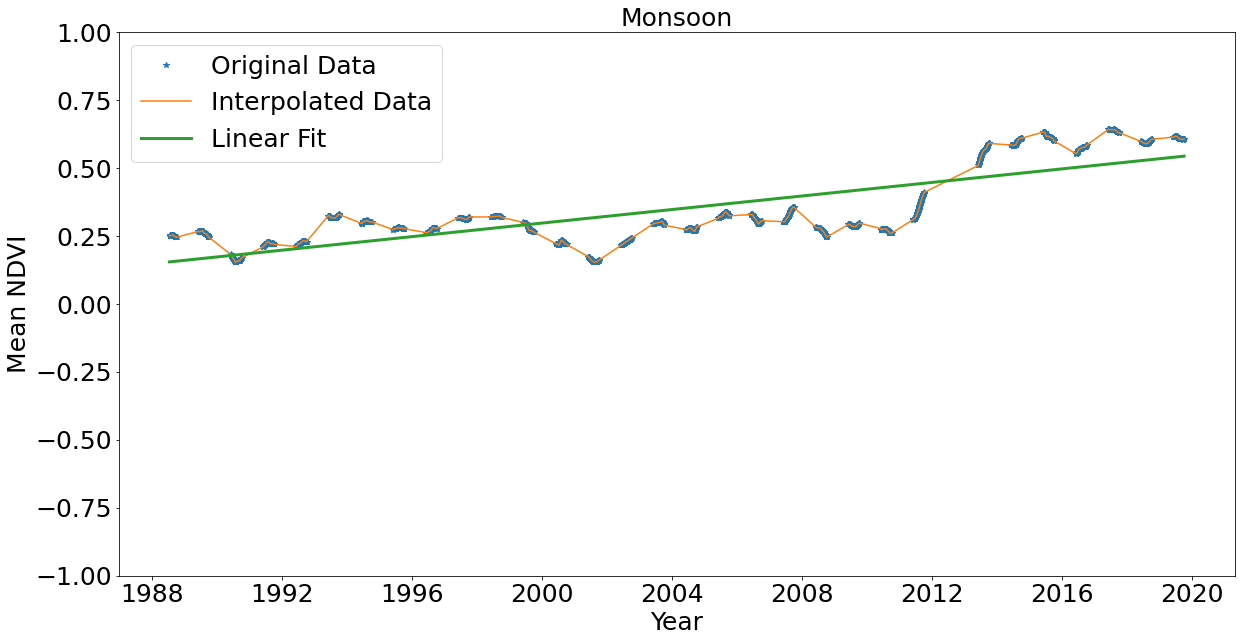

In [102]:
plt.figure(figsize=(20,10))
#plt.grid(True)
plt.plot(monsoon['Trend'].dropna(), '*')
plt.plot(monsoon['Trend'].dropna())
plt.plot(xf1monsoon,yfmonsoon,label='Linear fit',linewidth='3')

plt.xlabel('Year', fontsize=25)
plt.ylabel('Mean NDVI', fontsize=25)
plt.legend(['Original Data', 'Interpolated Data','Linear Fit'],fontsize=25)
plt.title("Monsoon", fontsize=25)
plt.ylim([-1, 1])
plt.savefig("D:/EVI papers/plots for 1988-2020/meanndvifrom1988-2020ofmonsoon29octoberlinearfit.jpg")
plt.show()

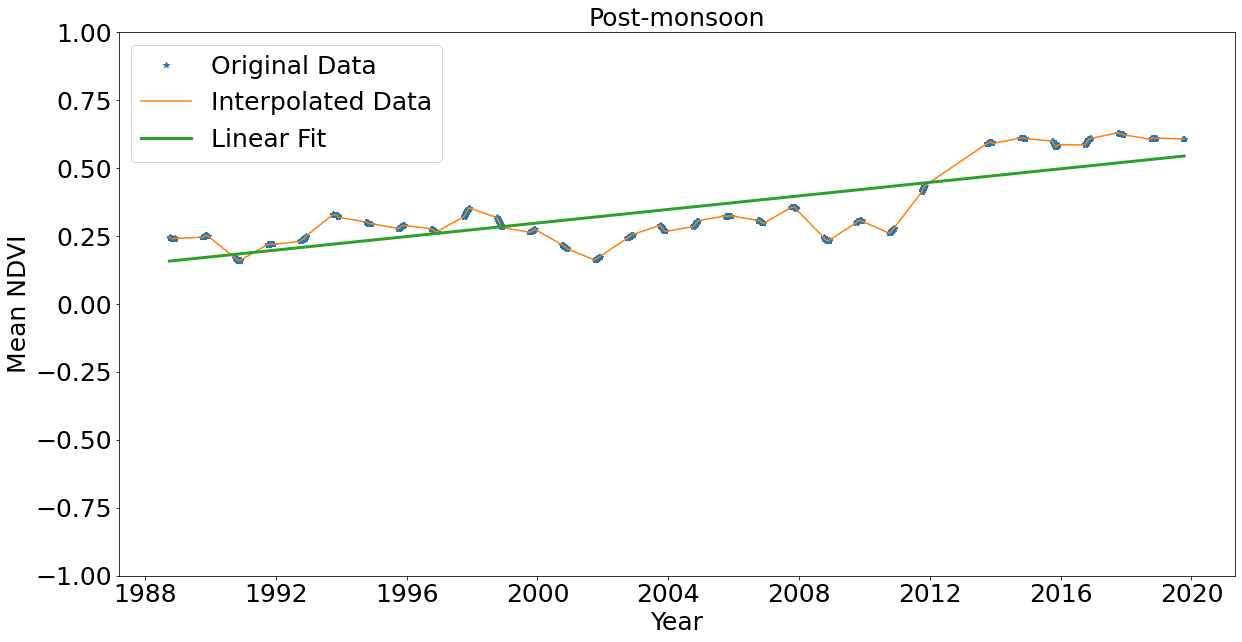

In [106]:
plt.figure(figsize=(20,10))
#plt.grid(True)
plt.plot(Post_monsoon['trend'].dropna(), '*')
plt.plot(Post_monsoon['trend'].dropna())
plt.plot(xf1post_monsoon,yfpost_monsoon,label='Linear fit',linewidth='3')

plt.xlabel('Year', fontsize=25)
plt.ylabel('Mean NDVI', fontsize=25)
plt.legend(['Original Data', 'Interpolated Data','Linear Fit'],fontsize=25)
plt.title("Post-monsoon", fontsize=25)
plt.ylim([-1, 1])
plt.savefig("D:/EVI papers/plots for 1988-2020/meanndvifrom1988-2020ofpostmonsoon29octoberlinearfitwithoutgrid.jpg")
plt.show()

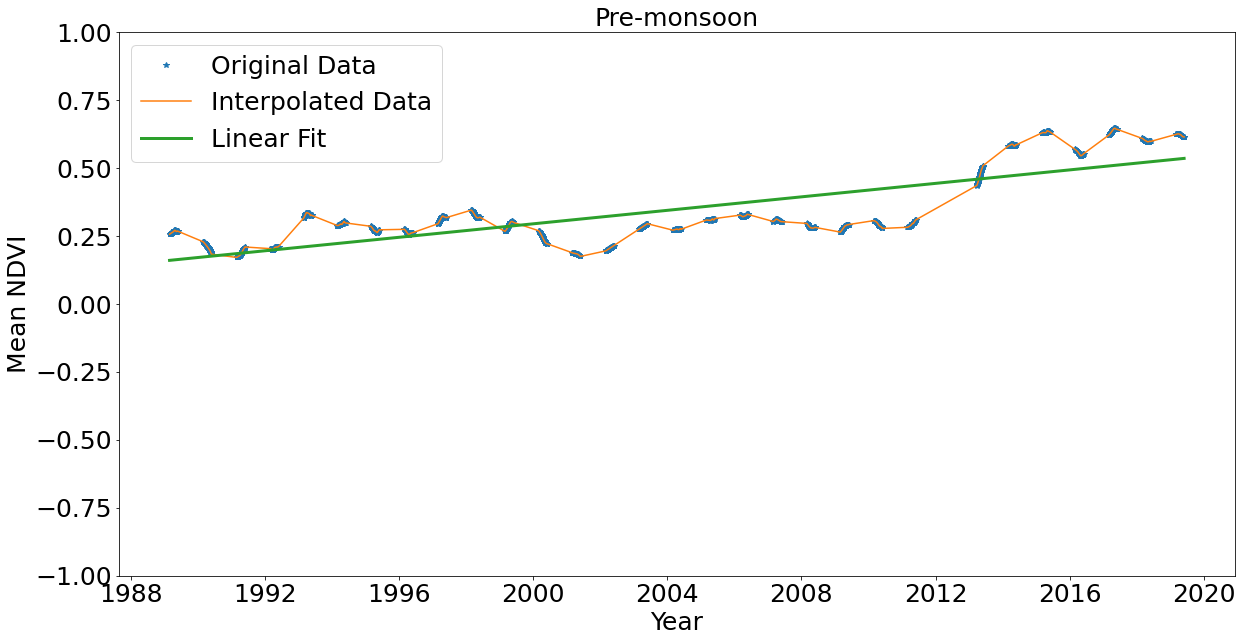

In [101]:
plt.figure(figsize=(20,10))
#plt.grid(True)
plt.plot(Pre_monsoon['NDVI'].dropna(), '*')
plt.plot(Pre_monsoon['NDVI'].dropna())
plt.rcParams['font.size'] = '25'

plt.plot(xf1, yf,label='Linear fit',linewidth='3')
plt.xlabel('Year', fontsize=25)
plt.ylabel('Mean NDVI', fontsize=25)
plt.legend(['Original Data', 'Interpolated Data', 'Linear Fit'],fontsize=25)
plt.title("Pre-monsoon", fontsize=25)
plt.ylim([-1, 1])
plt.savefig("D:/EVI papers/plots for 1988-2020/meanndvifrom1988-2020ofpremonsoon29octoberlinearfitwithoutgrid2.jpg")
plt.show()

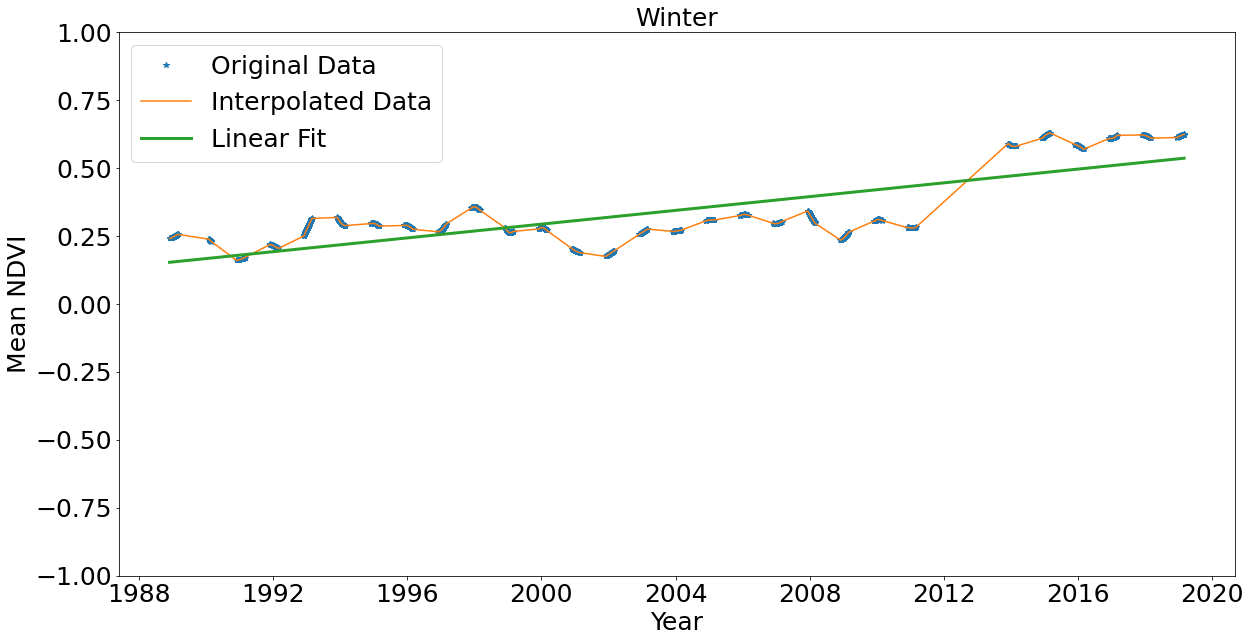

In [109]:
plt.figure(figsize=(20,10))
#plt.grid(True)
plt.plot(Winter_NDVI['trebd'].dropna().dropna(), '*')
plt.plot(Winter_NDVI['trebd'].dropna().dropna())
plt.plot(xf1winter, yfwinter,label='Linear fit',linewidth='3')

plt.xlabel('Year', fontsize=25)
plt.ylabel('Mean NDVI', fontsize=25)
plt.legend(['Original Data', 'Interpolated Data','Linear Fit'],fontsize=25)
plt.title("Winter", fontsize=25)
plt.ylim([-1, 1])
plt.savefig("D:/EVI papers/plots for 1988-2020/meanndvifrom1988-2020ofWinter29octoberLinearFitwithoutgrid.jpg")
plt.show()

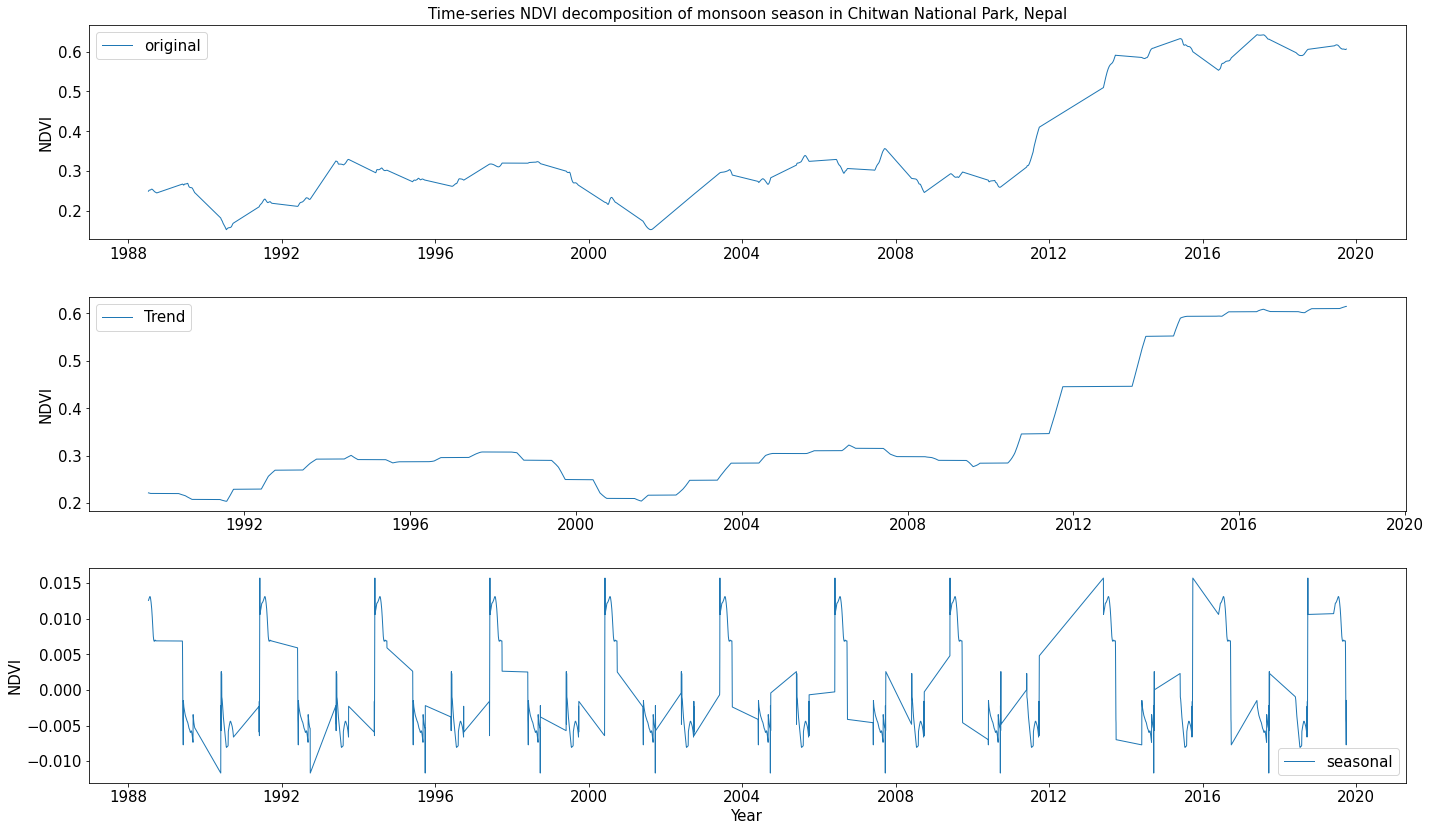

In [62]:
# Apply decompomposition on NDVI data monsoon

decomposition_NDVI = seasonal_decompose(monsoon.dropna(), model= 'additive', period = 365)    # additive worked better in terms of seasonality decomposition
                                                            # compared to multiplicative

# assign trend, seasonal components from decomposed data 

trend_NDVI = decomposition_NDVI.trend
#trend_NDVI.to_csv("D:/EVI papers/plots for 1988-2020/decomndvifrom1988-2020new2.csv")
seasonal_NDVI = decomposition_NDVI.seasonal


# Plot the original data, the trend, the seasonality, and the residual

plt.figure(figsize=(20,15))
plt.subplot(411)
plt.plot(monsoon, label = 'original', linewidth=1)

plt.legend(loc = 'best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.title('Time-series NDVI decomposition of monsoon season in Chitwan National Park, Nepal', fontsize=15)
plt.subplot(412)
plt.plot(trend_NDVI, label = 'Trend', linewidth=1)

plt.legend(loc = 'best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.subplot(413)

plt.plot(seasonal_NDVI, label = 'seasonal', linewidth=1)
plt.legend(loc = 'best', fontsize=15)
plt.ylabel('NDVI', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.tight_layout()

plt.savefig("D:/EVI papers/plots for 1988-2020/ndvivaluesfrom1988-2020decomlargenewfinal29octobermonsoon.jpg")


In [16]:
y=np.array(Pre_monsoon['NDVI'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(Pre_monsoon['NDVI'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err, 'slope=',slope,'\n', 'intercept=',intercept)

r =  0.7869749718402284 
 p =  0.0 
 s =  5.8926195972782994e-21 slope= 3.93001339822e-19 
 intercept= -0.07709165258796791


In [15]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline

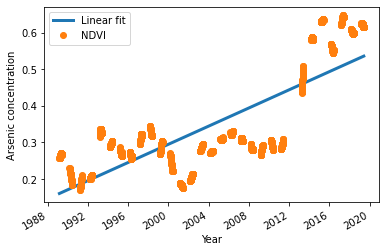

In [88]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
Pre_monsoon['NDVI'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('Arsenic concentration')
ax.legend();

In [19]:
ymonsoon=np.array(monsoon['Trend'].dropna().values, dtype=float)
xmonsoon=np.array(pd.to_datetime(monsoon['Trend'].dropna()).index.values, dtype=float)
slopemonsoon, interceptmonsoon, r_valuemonsoon, p_valuemonsoon, std_errmonsoon =sp.linregress(xmonsoon,ymonsoon)
xfmonsoon = np.linspace(min(xmonsoon),max(xmonsoon),100)
xf1monsoon = xfmonsoon.copy()
xf1monsoon = pd.to_datetime(xf1monsoon)
yfmonsoon = (slopemonsoon*xfmonsoon)+interceptmonsoon
print('r = ', r_valuemonsoon, '\n', 'p = ', p_valuemonsoon, '\n', 's = ', std_errmonsoon, 'slope=',slopemonsoon,'\n', 'intercept=',interceptmonsoon)

r =  0.7938386504763676 
 p =  0.0 
 s =  4.948412570737198e-21 slope= 3.949321388435108e-19 
 intercept= -0.07602321418123065


In [20]:
ypost_monsoon=np.array(Post_monsoon['trend'].dropna().values, dtype=float)
xpost_monsoon=np.array(pd.to_datetime(Post_monsoon['trend'].dropna()).index.values, dtype=float)
slopepost_monsoon, interceptpost_monsoon, r_valuepost_monsoon, p_valuepost_monsoon, std_errpost_monsoon =sp.linregress(xpost_monsoon,ypost_monsoon)
xfpost_monsoon = np.linspace(min(xpost_monsoon),max(xpost_monsoon),100)
xf1post_monsoon = xfpost_monsoon.copy()
xf1post_monsoon = pd.to_datetime(xf1post_monsoon)
yfpost_monsoon = (slopepost_monsoon*xfpost_monsoon)+interceptpost_monsoon
print('r = ', r_valuepost_monsoon, '\n', 'p = ', p_valuepost_monsoon, '\n', 's = ', std_errpost_monsoon,'slope=',slopepost_monsoon,'\n', 'intercept=',interceptpost_monsoon)

r =  0.7854080606258539 
 p =  0.0 
 s =  7.310872357784105e-21 slope= 3.9488278807094436e-19 
 intercept= -0.07579290413096107


In [24]:
ywinter=np.array(Winter_NDVI['trebd'].dropna().values, dtype=float)
xwinter=np.array(pd.to_datetime(Winter_NDVI['trebd'].dropna()).index.values, dtype=float)
slopewinter, interceptwinter, r_valuewinter, p_valuewinter, std_errwinter =sp.linregress(xwinter,ywinter)
xfwinter = np.linspace(min(xwinter),max(xwinter),100)
xf1winter = xfwinter.copy()
xf1winter = pd.to_datetime(xf1winter)
yfwinter = (slopewinter*xfwinter)+interceptwinter
print('r = ', r_valuewinter, '\n', 'p = ', p_valuewinter, '\n', 's = ', std_errwinter,'slope=',slopewinter,'\n', 'intercept=',interceptwinter)

r =  0.778306205491017 
 p =  0.0 
 s =  6.471656345273099e-21 slope= 4.013435844062208e-19 
 intercept= -0.08618178192886294


In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [23]:
ywinter=np.array(Winter_NDVI['trebd'].dropna().values, dtype=float).reshape(-1, 1)
xwinter=np.array(pd.to_datetime(Winter_NDVI['trebd'].dropna()).index.values, dtype=float).reshape(-1, 1)

In [24]:
model = LinearRegression().fit(xwinter, ywinter)


In [25]:
r_sq = model.score(xwinter, ywinter)

In [26]:
print('r squared', r_sq)

r squared 0.6057605495058264


In [27]:
 model.intercept_

array([-0.08618178])

In [28]:
model.coef_

array([[4.01343584e-19]])